# Ayush Shinde
Exploratory Data Analysis - Retail using Python

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [144]:
df= pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [145]:
df.shape

(9994, 13)

In [146]:
#to check null values in dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [147]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Sales and Profits by Region

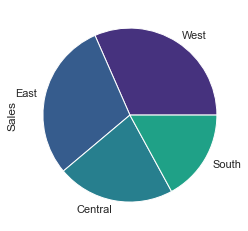

In [148]:
#Sales by Region
sales_by_reg = df.groupby('Region')['Sales'].sum().sort_values(ascending= False)
sales_by_reg.plot(kind='pie')

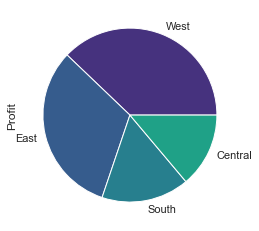

In [149]:
#Profit by Region
prof_by_reg = df.groupby('Region')['Profit'].sum().sort_values(ascending= False)
prof_by_reg.plot(kind='pie')

### Sales and Profit by Category

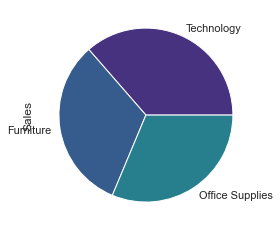

In [150]:
#sales_by_category
sales_by_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending= False)
sales_by_cat.plot(kind='pie')

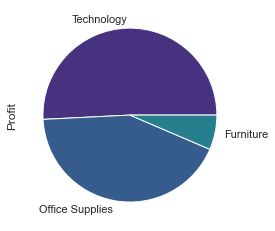

In [151]:
#profit_by_category
prof_by_cat = df.groupby('Category')['Profit'].sum().sort_values(ascending= False)
prof_by_cat.plot(kind='pie')

### Sales and Profits by Segments

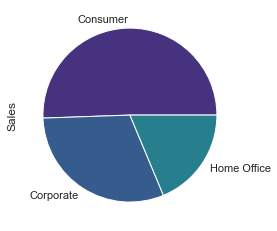

In [152]:
#sales_by_segment
sales_by_seg = df.groupby('Segment')['Sales'].sum().sort_values(ascending= False)
sales_by_seg.plot(kind='pie')

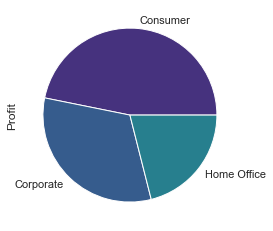

In [153]:
#profit_by_segment
prof_by_seg = df.groupby('Segment')['Profit'].sum().sort_values(ascending= False)
prof_by_seg.plot(kind='pie')

### Barplots for further profit analysis

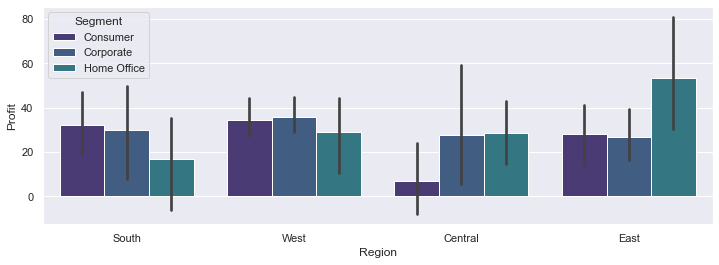

In [154]:
plt.figure(figsize = (12,4)) 
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()  

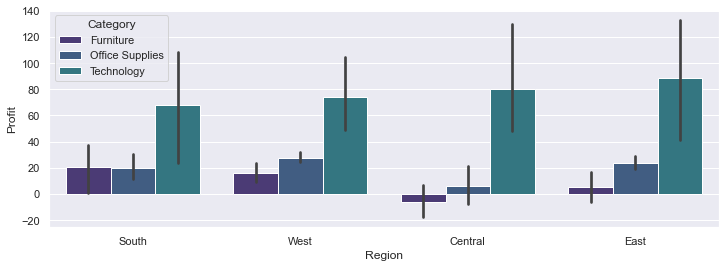

In [155]:
plt.figure(figsize = (12,4)) 
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.show()  

### Discounts by Category

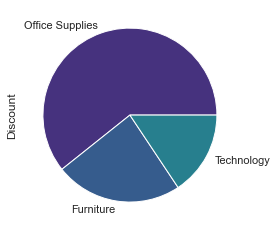

In [156]:
disc = df.groupby('Category')['Discount'].sum().sort_values(ascending= False)
disc.plot(kind="pie")

### Sales by state

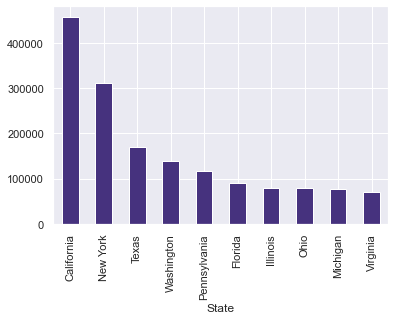

In [158]:
#Sales by State
sales = df.groupby('State')['Sales'].sum().sort_values(ascending= False)
#top 10 states by sales 
sales[:10].plot(kind= 'bar')

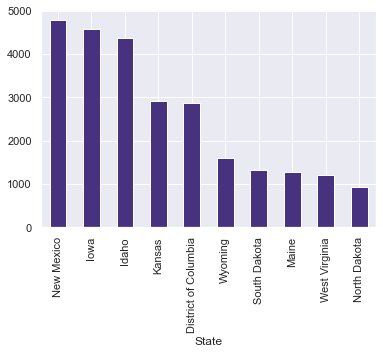

In [159]:
#bottom 10 states by sales 
sales[39:].plot(kind= 'bar')
                 

### Profits by State

Text(0, 0.5, 'Profit')

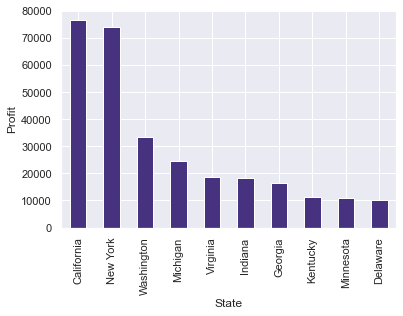

In [161]:
profits = df.groupby('State')['Profit'].sum().sort_values(ascending= False)

#top 10 states by profit
profits[:10].plot(kind = 'bar')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

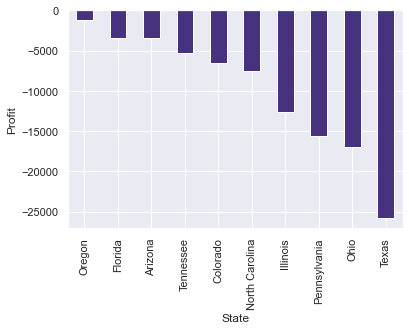

In [162]:
#bottom 10 states by profit
profits[39:].plot(kind = 'bar')
plt.ylabel('Profit')

### Sub category vs Region Analysis

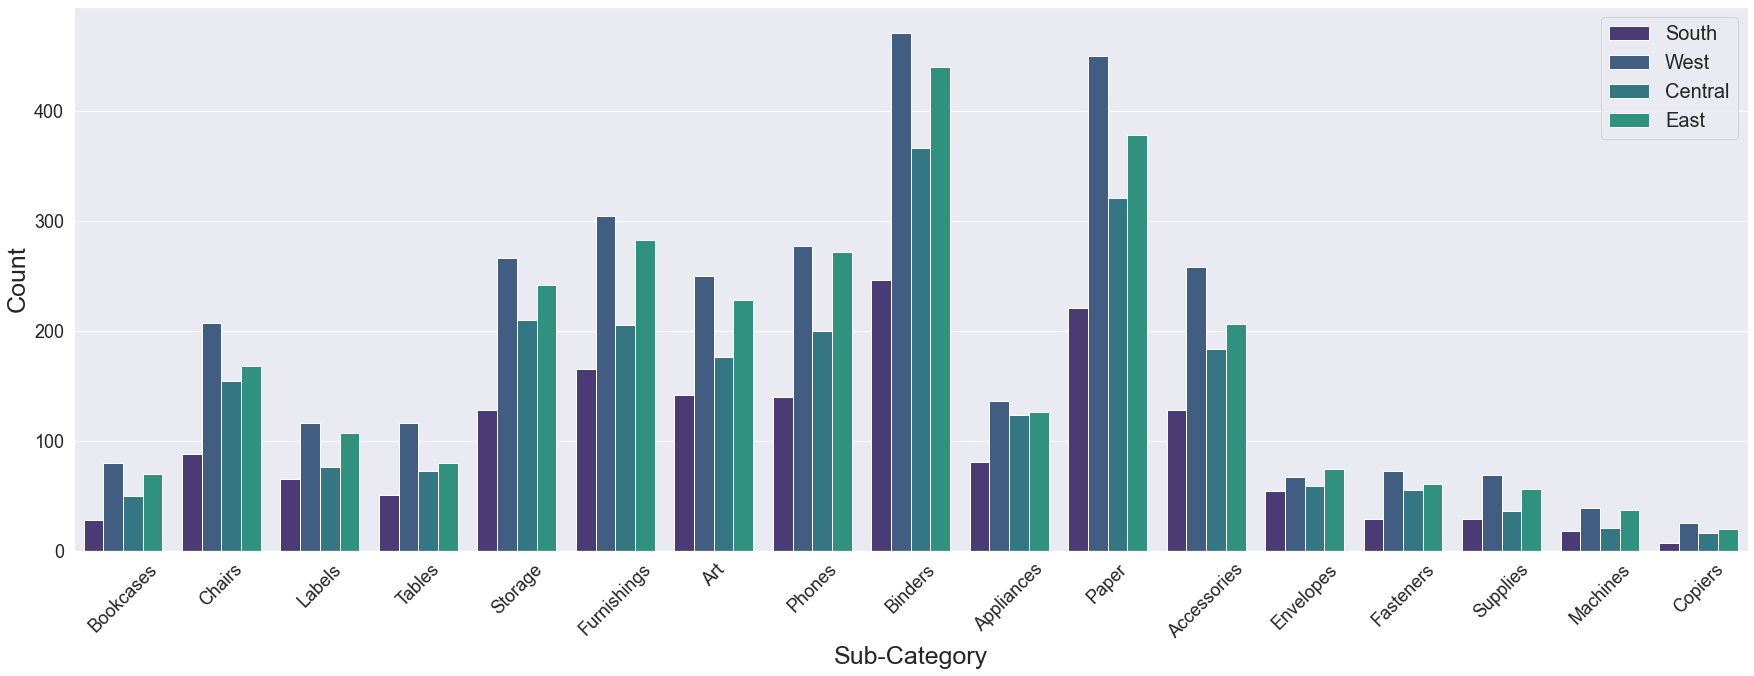

In [163]:
#Sub category vs Region
plt.figure(figsize =(30,10))
sns.countplot(x='Sub-Category', hue='Region', data=df)
plt.xticks(rotation= 45, fontsize= 18)
plt.yticks(fontsize= 18)
plt.xlabel('Sub-Category',fontsize= 25)
plt.ylabel('Count',fontsize= 25)
plt.legend(fontsize='20')


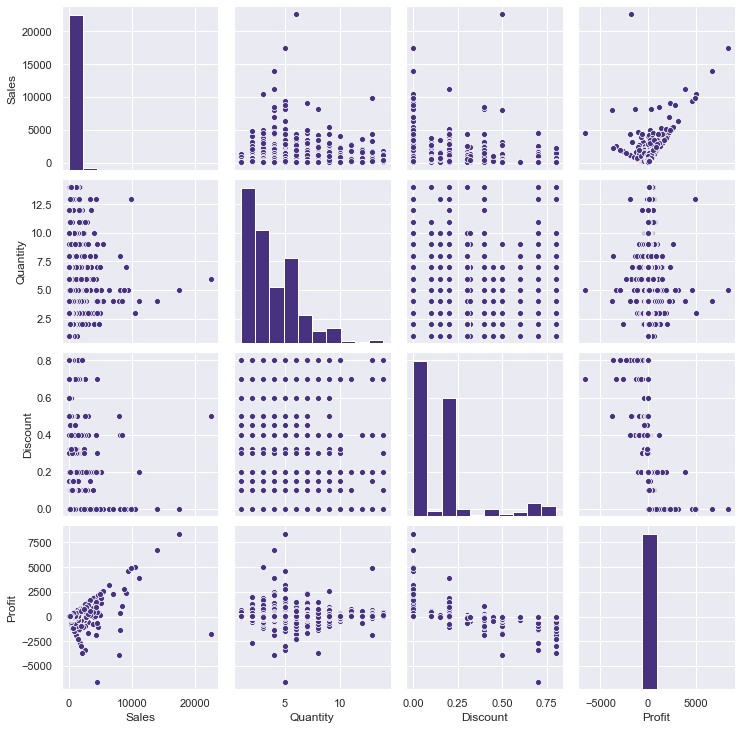

In [164]:
df2= df.loc[:,['Sales', 'Quantity','Discount','Profit']]
sns.pairplot(df2)

For further analysis on correlation of Profit with other factors we need to create a heatmap 




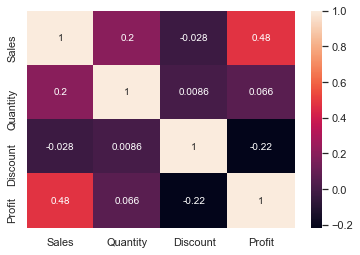

In [165]:
#correlation
df3= df2.corr()
sns.heatmap(df3, annot=True)

Hence from above heatmap its clear that there is negative correlation between Sales & Discount and Profit and Discount.

## From all the above analysis we can conclude that
1.Profits and Sales are positively correlated in all the regions, i.e with increase in sales, Profits also increase.<br>
2.Profits could be observed in most of the segments of all the regions except Consumer segment of Central region and Home Office segment of South region which are bearing some losses.<br>
3.Furniture category is bearing significant losses in Central region and small losses in South & East region.<br>
4.Profit margin in California and New York is very high compared to other states.<br>
5.Whereas Pennsylvania, Ohio, Texas are among the States bearing highest losses.<br>
6.Binders and Papers have the highest sales across all the Regions, whereas Macines and Copiers have least sales<br> 
7.Profit and Sales have no significant correaltion for value of sales below 5000; After that Profit and Sales are postively correllated to each other.<br>
8.No significant correlation between Quantity and Profit. <br>
9.When Discount offered is less Profits rise and when the Discount increases, losses are suffered.<br>


To increase profits there should be a balance between the sales and the discounts offered.<br>
Profits in furniture segment can be incresed by decresing the dicounts on them.<br>
Sales in the South and Central Region should be focused.<br>
States with lesser sales(West Virginia, Dakota, Wyoming etc.) should be focused.<br>

# Thank You